## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the Models and the Test Set

In [3]:
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Load the Traiuned Models
final_models = {
    'RandomForest': joblib.load('../models/RandomForest_model.pkl'),
    'XGBoost': joblib.load('../models/XGBoost_model.pkl'),
    'Ridge': joblib.load('../models/Ridge_model.pkl')
}

## Visulaize Model Peformance

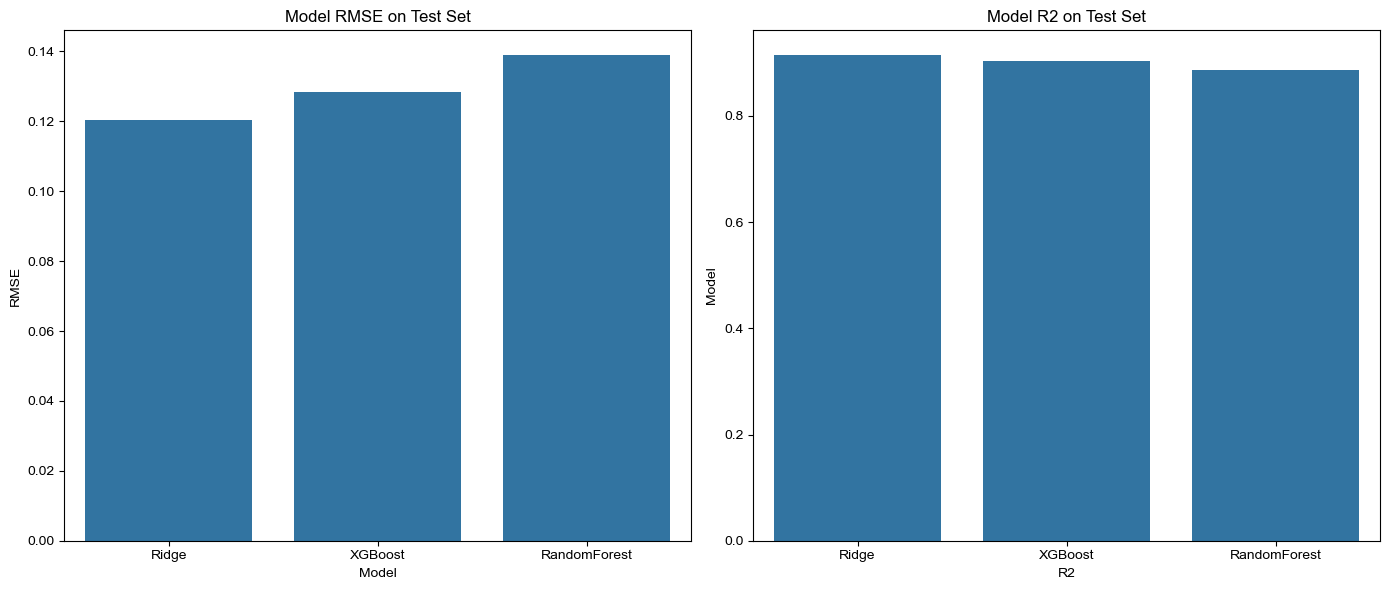

In [4]:
test_result_df= pd.read_csv('../results/test_results.csv', index_col=0)
fig, axes= plt.subplots(1,2, figsize=(14,6))

# BarChart for RMSE
sns.barplot(x= test_result_df.index, y= 'RMSE', data= test_result_df, ax= axes[0])
axes[0].set_title('Model RMSE on Test Set')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('Model')

# BarChart for R2 
sns.barplot(x= test_result_df.index, y= 'R2', data= test_result_df, ax= axes[1])
axes[1].set_title('Model R2 on Test Set')
axes[1].set_xlabel('R2')
axes[1].set_ylabel('Model')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

## Actual VS Predicted Plot

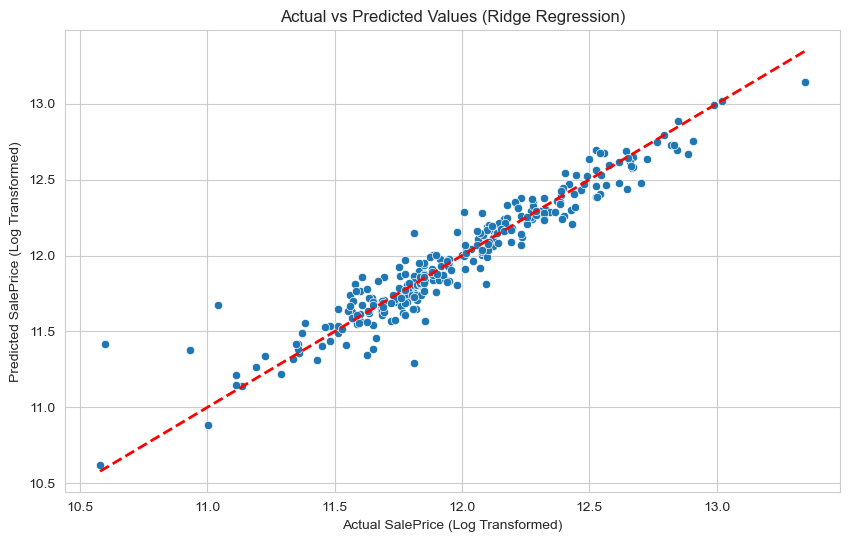

In [5]:
y_pred_ridge= final_models['Ridge'].predict(X_test)
y_test= y_test.values.flatten()
y_pred_ridge= y_pred_ridge.flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y= y_pred_ridge)

perfect_line= np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(perfect_line, perfect_line, color= 'red', linestyle= '--', linewidth= 2)

plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Actual SalePrice (Log Transformed)')
plt.ylabel('Predicted SalePrice (Log Transformed)')
plt.show()


## Residuals Plot

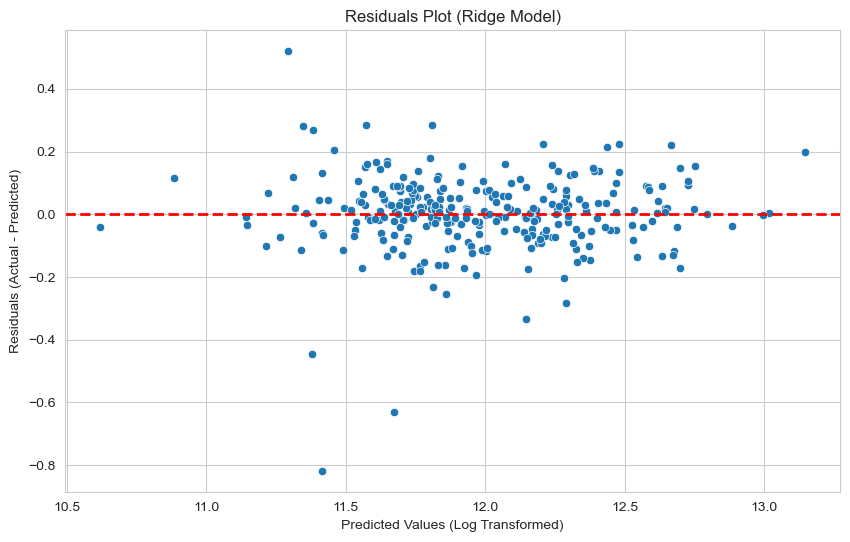

In [6]:
y_pred_ridge= final_models['Ridge'].predict(X_test)
residuals= y_test - y_pred_ridge

plt.figure(figsize= (10,6))
sns.scatterplot(x= y_pred_ridge, y= residuals)
plt.axhline(y= 0, color= 'red', linestyle= '--', linewidth= 2)

plt.title('Residuals Plot (Ridge Model)')
plt.xlabel('Predicted Values (Log Transformed)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


## Residuals Analysis for Ridge Regression

The residuals plot indicates that the **Ridge Regression model** is a good fit for the data.

### Characteristics of a Good Residual Plot
- The points are randomly scattered around the horizontal line at **y = 0**.  
  → This shows that the model's errors are random rather than systematic.  
- There is **no visible pattern** (e.g., curves or funnel shapes).  
  → This suggests the model is effectively capturing the underlying relationship.  
- The model is **not consistently over-predicting or under-predicting** house prices.  

### Conclusion
The residuals distribution confirms that Ridge Regression provides a reliable fit to the Ames Housing dataset.


## Analyze Feature Importance and Coefficients

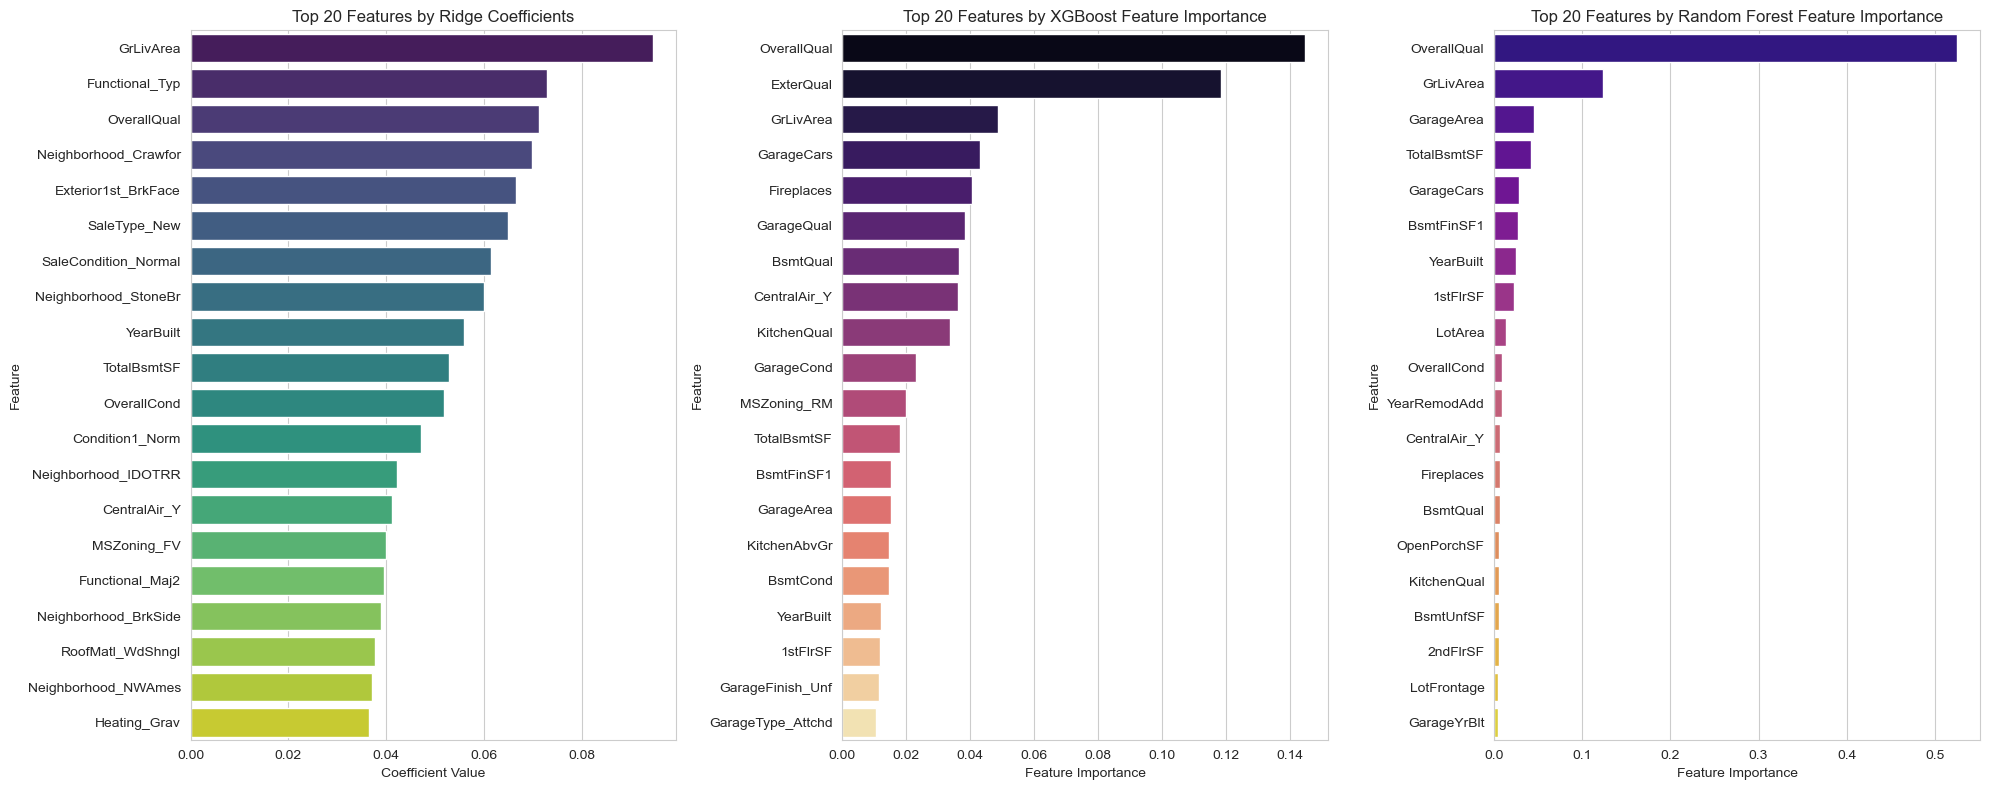

In [7]:
# Get feature coefficients for the Ridge model
ridge_coeffs= pd.Series(final_models['Ridge'].coef_, index= X_test.columns)
ridge_coeffs_sorted= ridge_coeffs.abs().sort_values(ascending=False).head(20)

# Get feature importances for the XGBoost model
xgb_importances= pd.Series(final_models['XGBoost'].feature_importances_, index= X_test.columns)
xgb_importances_sorted= xgb_importances.sort_values(ascending=False).head(20)

# Get feature importances for the Random Forest model
rf_importances= pd.Series(final_models['RandomForest'].feature_importances_, index= X_test.columns)
rf_importances_sorted= rf_importances.sort_values(ascending=False).head(20)


fig, axes= plt.subplots(1,3, figsize=(20,8))

#Plot Ridge Coefficients
sns.barplot(x= ridge_coeffs_sorted.values, y= ridge_coeffs_sorted.index, ax= axes[0], palette='viridis')
axes[0].set_title('Top 20 Features by Ridge Coefficients')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Feature')

# Plot XGBoost Importances
sns.barplot(x= xgb_importances_sorted.values, y= xgb_importances_sorted.index, ax= axes[1], palette='magma')
axes[1].set_title('Top 20 Features by XGBoost Feature Importance')
axes[1].set_xlabel('Feature Importance')
axes[1].set_ylabel('Feature')

# Plot Random Forest Importances
sns.barplot(x= rf_importances_sorted.values, y= rf_importances_sorted.index, ax= axes[2], palette='plasma')
axes[2].set_title('Top 20 Features by Random Forest Feature Importance')
axes[2].set_xlabel('Feature Importance')
axes[2].set_ylabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
deployment_dir = '../Deployment_Artifacts'

ridge_coeffs = pd.Series(final_models['Ridge'].coef_, index=X_test.columns)
top_10_features = ridge_coeffs.abs().sort_values(ascending=False).head(10).index.tolist()
joblib.dump(top_10_features, f'{deployment_dir}/top_10_input_features.joblib')

print("\nTop 10 input features list saved successfully.")


Top 10 input features list saved successfully.
